# Define a marine habitat

The TurleWatch project investigated the thermal habitat of loggerhead sea turtles in the Pacific Ocean north of the Hawaiian Islands. Research results indicate that most loggerhead turtles stay in water between 17.5°C and 18.5°C. When the 17.5°C to 18.5°C temperature contour is drawn on a map of sea surface temperature conditions, it delineates the boundary of the loggerhead's preferred habitat.  

### Objective  
In this exercise you will map the thermal boundary of loggerhead sea turtles preferred habitat using satellite sea surface temperature data. 

### The exercise demonstrates the following techniques:  
* Subsetting and loading data from an ERDDAP server using xarray  
* Set flag values for features of interest  
* Plotting maps  

### Datasets used
__Multi-scale Ultra-high Resolution (MUR) Sea Surface Temperature v04.1__  
This is a merged, multi-sensor Sea Surface Temperature (SST) product from Jet Propulsion Laboratory (JPL) that blends data from many sensors and then uses an interpolation method to fill any data gaps. The dataset is at 1 km spactial resolution with a temporal coverage extending from 2002 to present. Detailed information is available on the NASA Jet Propulsion Laboratory website (https://podaac.jpl.nasa.gov/dataset/MUR-JPL-L4-GLOB-v4.1). The dataset is available on the CoastWatch West Coast Node website at the following link. 
http://coastwatch.pfeg.noaa.gov/erddap/griddap/jplMURSST41mday

### Install required packages  

In [1]:
import xarray as xr    
import numpy as np
import pyproj  
from pyproj import CRS
from pyproj import Transformer as transformer
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import matplotlib as mpl

## Select a geographical range
##### Select an area spanning the Pacific from Hawaii to California 
    * longitude range of -155 to -115 east  
    * latitude range of 10 to 40 north    
##### Select a date 
    * For this exercise select '2018-06-06'(June 6, 2018)   
##### Set variables for the habitat temperature range

In [13]:
lon_min = -155
lon_max = -115

lat_min = 10
lat_max = 40

date_for_sat_data = '2018-06-06'

hab_temperature_min = 17.5
hab_temperature_max = 18.5

## Open the netCDF file to create an Xarray dataset object

In [14]:
url = "http://coastwatch.pfeg.noaa.gov/erddap/griddap/jplMURSST41mday"
ds = xr.open_dataset(url)
ds

<xarray.Dataset>
Dimensions:    (time: 253, latitude: 17999, longitude: 36000)
Coordinates:
  * time       (time) datetime64[ns] 2002-06-16 2002-07-16 ... 2023-07-16
  * latitude   (latitude) float32 -89.99 -89.98 -89.97 ... 89.97 89.98 89.99
  * longitude  (longitude) float32 -180.0 -180.0 -180.0 ... 180.0 180.0 180.0
Data variables:
    sst        (time, latitude, longitude) float32 ...
    nobs       (time, latitude, longitude) float64 ...
    mask       (time, latitude, longitude) float32 ...
Attributes: (12/40)
    cdm_data_type:              Grid
    Conventions:                CF-1.6, COARDS, ACDD-1.3
    creation_date:              2023-08-03
    creator_email:              erd.data@noaa.gov
    creator_name:               NOAA NMFS SWFSC ERD and NOAA NESDIS CoastWatc...
    creator_type:               institution
    ...                         ...
    summary:                    A monthly mean Sea Surface Temperature (SST) ...
    testOutOfDate:              now-60days
    time_coverage_end:          2023-07-16T00:00:00Z
    time_coverage_start:        2002-06-16T00:00:00Z
    title:                      Multi-scale Ultra-high Resolution (MUR) SST A...
    Westernmost_Easting:        -179.99

## Download subset the ERDDAP dataset  
The code below does the following:
* Trims the data to include only SST data  
* Selects the date. To avoid the need to match the exact date found in the dataset, include `method='nearest'`. 
* Slices within the latitude and longitude ranges

In [19]:
ds_subset = ds['sst'].sel(time=date_for_sat_data, 
                          method='nearest'
                          ).sel(latitude=slice(lat_min, lat_max),
                                longitude=slice(lon_min, lon_max)
                                )


## Make a plot to view the data
This may take a few seconds. So far you have only set the parameters for download but not requested that the data be downloaded. However, downloading will be necessary to plot the data, so xarray will download it. 

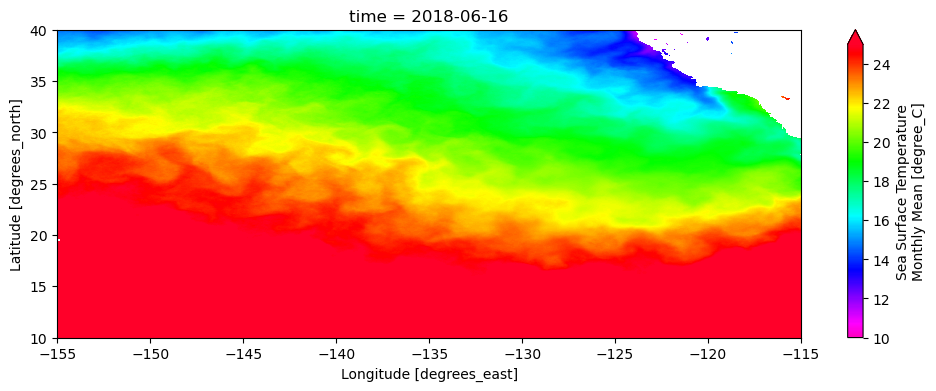

In [16]:
ds_subset.plot.pcolormesh(cmap="gist_rainbow_r",
                          vmin=10,
                          vmax=25,
                          aspect=3,
                          size=4
                          )

## Mask the habitat region
* The habitat range is between 17.5°C and 18.5°C.
* Use the "where" function of xarray to flag all pixels in the habitat range by replacing their values with a value that is much smaller than the data range minimum.

In [17]:
ds_masked = xr.where((ds_subset>hab_temperature_min) & (ds_subset<hab_temperature_max), 
                     -999,  # Set flag value
                     ds_subset  
                     )

##  Map the masked data 
We make some adjustments to the color map:  
* Set the palette to be the reverse of the gist_rainbow  
* Set missing values (like land..) to gray  
* Set the flag value color 

Text(0.5, 0, 'Longitude')

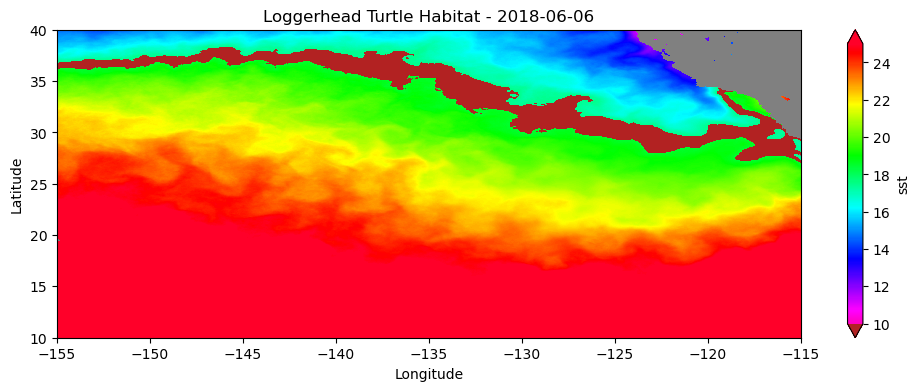

In [18]:
# Create the color palette
cmap = mpl.cm.get_cmap("gist_rainbow_r").copy()

# Set the color of the missing or masked data 
cmap.set_bad(color='gray')  # missing values color (like land..)

# Set the color of flag value (-999)
cmap.set_under(color='firebrick')  # flag value color

# Plot the data
ds_masked.plot.pcolormesh(cmap=cmap,
                          vmin=10,
                          vmax=25,
                          aspect=3,
                          size=4
                          )

# Add plot annotation
plt.title('Loggerhead Turtle Habitat - ' + date_for_sat_data)
plt.ylabel('Latitude')
plt.xlabel('Longitude')